# IS 4487 Assignment 9: Customer Segmentation with Clustering

In this assignment, you will:
- Apply unsupervised learning to explore patterns in hotel booking behavior
- Use K-Means and Gaussian Mixture Models (GMM) for customer segmentation
- Evaluate model quality with metrics like Silhouette Score and Davies-Bouldin Index
- Connect clustering to actionable business insights

## Why This Matters

Businesses like hotels and travel platforms (e.g., Airbnb or Expedia) rely on customer segmentation to tailor promotions, pricing strategies, and service levels. Unlike supervised models, clustering helps uncover patterns when no labels exist—an ideal tool when entering new markets or analyzing unstructured customer behavior.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_09_clustering.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Description: Hotel Bookings

This dataset contains booking information for two types of hotels: a **city hotel** and a **resort hotel**. Each record corresponds to a single booking and includes various details about the reservation, customer demographics, booking source, and whether the booking was canceled.

**Source**: [GitHub - TidyTuesday: Hotel Bookings](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

### Key Use Cases
- Understand customer booking behavior
- Explore factors related to cancellations
- Segment guests based on booking characteristics
- Compare city vs. resort hotel performance

### Data Dictionary

| Variable | Type | Description |
|----------|------|-------------|
| `hotel` | character | Hotel type: City or Resort |
| `is_canceled` | integer | 1 = Canceled, 0 = Not Canceled |
| `lead_time` | integer | Days between booking and arrival |
| `arrival_date_year` | integer | Year of arrival |
| `arrival_date_month` | character | Month of arrival |
| `stays_in_weekend_nights` | integer | Nights stayed on weekends |
| `stays_in_week_nights` | integer | Nights stayed on weekdays |
| `adults` | integer | Number of adults |
| `children` | integer | Number of children |
| `babies` | integer | Number of babies |
| `meal` | character | Type of meal booked |
| `country` | character | Country code of origin |
| `market_segment` | character | Booking source (e.g., Direct, Online TA) |
| `distribution_channel` | character | Booking channel used |
| `is_repeated_guest` | integer | 1 = Repeated guest, 0 = New guest |
| `previous_cancellations` | integer | Past booking cancellations |
| `previous_bookings_not_canceled` | integer | Past bookings not canceled |
| `reserved_room_type` | character | Initially reserved room type |
| `assigned_room_type` | character | Room type assigned at check-in |
| `booking_changes` | integer | Number of booking modifications |
| `deposit_type` | character | Deposit type (No Deposit, Non-Refund, etc.) |
| `agent` | character | Agent ID who made the booking |
| `company` | character | Company ID (if booking through company) |
| `days_in_waiting_list` | integer | Days on the waiting list |
| `customer_type` | character | Booking type: Contract, Transient, etc. |
| `adr` | float | Average Daily Rate (price per night) |
| `required_car_parking_spaces` | integer | Requested parking spots |
| `total_of_special_requests` | integer | Number of special requests made |
| `reservation_status` | character | Final status (Canceled, No-Show, Check-Out) |
| `reservation_status_date` | date | Date of the last status update |

This dataset is ideal for classification, segmentation, and trend analysis exercises.

## 1. Setup and Load Data

Business framing:  

Before we can cluster or segment anything, we need clean, accessible data in a usable format.

- Import the necessary Python libraries
- Load the hotel bookings dataset [(Download Here)](https://github.com/rfordatascience/tidytuesday/blob/main/data/2020/2020-02-11/readme.md#get-the-data-here)
- Display the first few rows

### In Your Response:
1. What stands out in the initial preview? Any columns or rows that seem unusual?


In [2]:
# Add code here 🔧
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-02-11/hotels.csv')

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### ✍️ Your Response: 🔧
1. The dataset has 119,390 bookings with 32 features. Key observations:
- Missing values in `company` (94% missing), `agent` (14% missing), and `country` (0.4% missing)
- Unusual `adr` values: minimum of -6.38 (negative pricing) and maximum of 5,400 (extreme outlier)
- Some bookings show 0 adults with $0 ADR, likely canceled or placeholder entries
- Good mix of numeric and categorical variables suitable for clustering


## 2. Select and Prepare Features

Business framing:  

A hotel might want to group guests based on how long they stay, how far in advance they book, or how likely they are to make special requests. You need to pick variables that represent meaningful guest behavior.

- Choose 3–5 numeric features related to customer behavior
- Drop missing values if needed
- Standardize using `StandardScaler`

### In Your Response:
1. What features did you select and why?
2. What kinds of patterns or segments do you expect to find?


In [4]:
# Add code here 🔧
# Select 3-5 numeric features related to customer behavior
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
            'adr', 'total_of_special_requests']

# Create a copy with selected features
df_features = df[features].copy()

# Drop missing values
df_features = df_features.dropna()

# Display info before scaling
print("Features selected:")
print(df_features.describe())
print(f"\nDataset shape after dropping nulls: {df_features.shape}")

# Standardize using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# Convert back to DataFrame for easier handling
df_scaled = pd.DataFrame(df_scaled, columns=features, index=df_features.index)

print("\nScaled features (first 5 rows):")
print(df_scaled.head())

Features selected:
           lead_time  stays_in_weekend_nights  stays_in_week_nights  \
count  119390.000000            119390.000000         119390.000000   
mean      104.011416                 0.927599              2.500302   
std       106.863097                 0.998613              1.908286   
min         0.000000                 0.000000              0.000000   
25%        18.000000                 0.000000              1.000000   
50%        69.000000                 1.000000              2.000000   
75%       160.000000                 2.000000              3.000000   
max       737.000000                19.000000             50.000000   

                 adr  total_of_special_requests  
count  119390.000000              119390.000000  
mean      101.831122                   0.571363  
std        50.535790                   0.792798  
min        -6.380000                   0.000000  
25%        69.290000                   0.000000  
50%        94.575000                   0.

### ✍️ Your Response: 🔧
1. Selected 5 features capturing different behavioral dimensions:
- `lead_time`: Booking planning behavior
- `stays_in_weekend_nights` & `stays_in_week_nights`: Stay patterns (leisure vs. business)
- `adr`: Price sensitivity and willingness to pay
- `total_of_special_requests`: Service engagement level

2. Expected segments:
- Last-minute bookers with shorter stays
- Early planners with longer stays
- Weekend leisure travelers
- Budget-conscious guests vs. premium guests


## 3. Apply K-Means Clustering

Business framing:  

Let’s say you’re working with the hotel’s marketing manager. She wants to group guests into a few clear types to target email campaigns. K-Means is a fast, simple way to try this.

- Fit a `KMeans` model with your selected features
- Choose a value of `k` (e.g. 3, 4, or 5)
- Predict clusters and assign to each guest
- Visualize using a scatterplot of 2 features

Much of this assignment has already been covered in the lab. Please be sure to complete the lab before the assignment.

### In Your Response:
1. What `k` value did you choose, and how did you decide?
2. What types of customers seem to show up in the clusters?



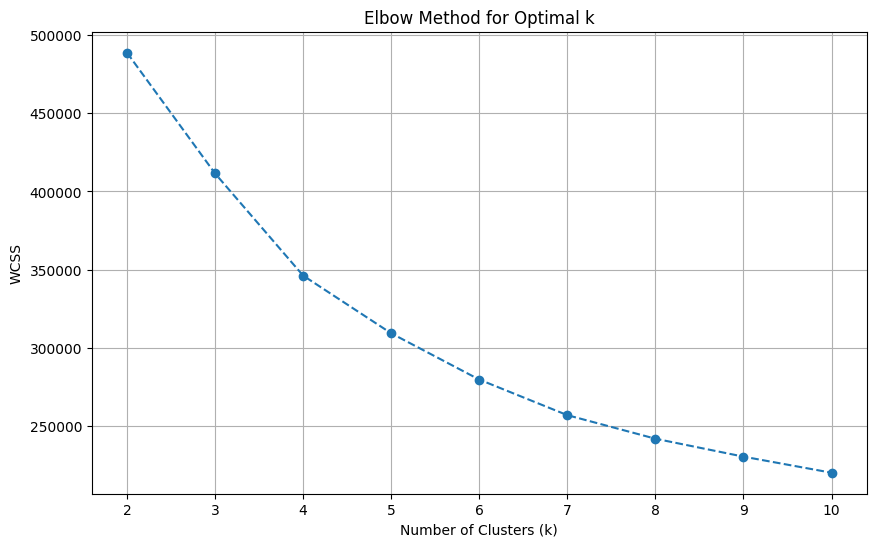


KMeans Cluster Distribution (k=4):
kmeans_cluster
0    21456
1    15759
2    54220
3    27955
Name: count, dtype: int64


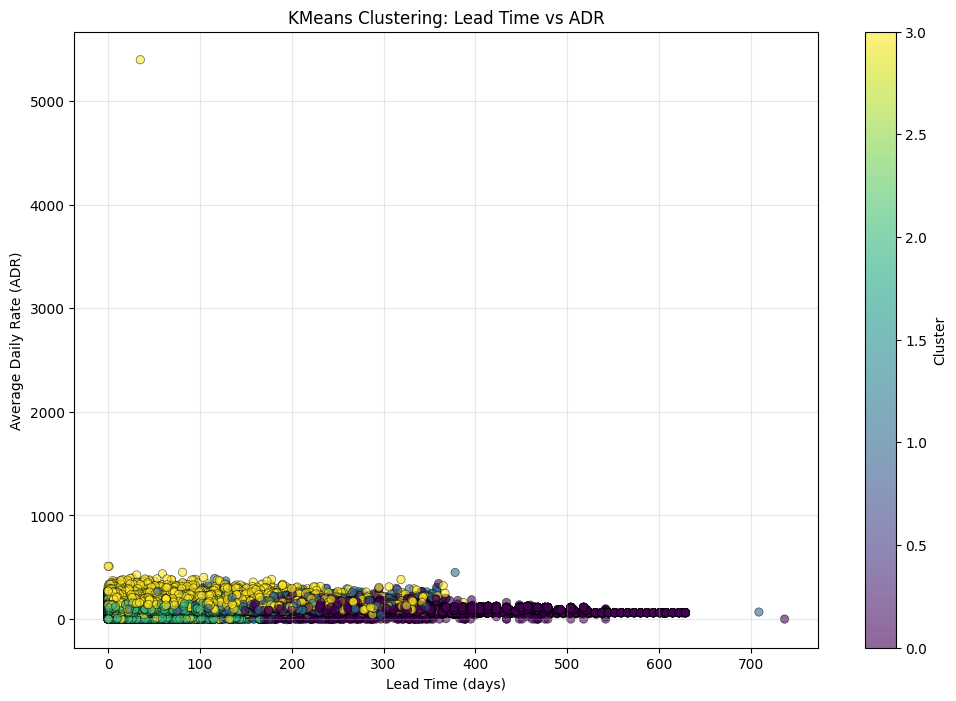

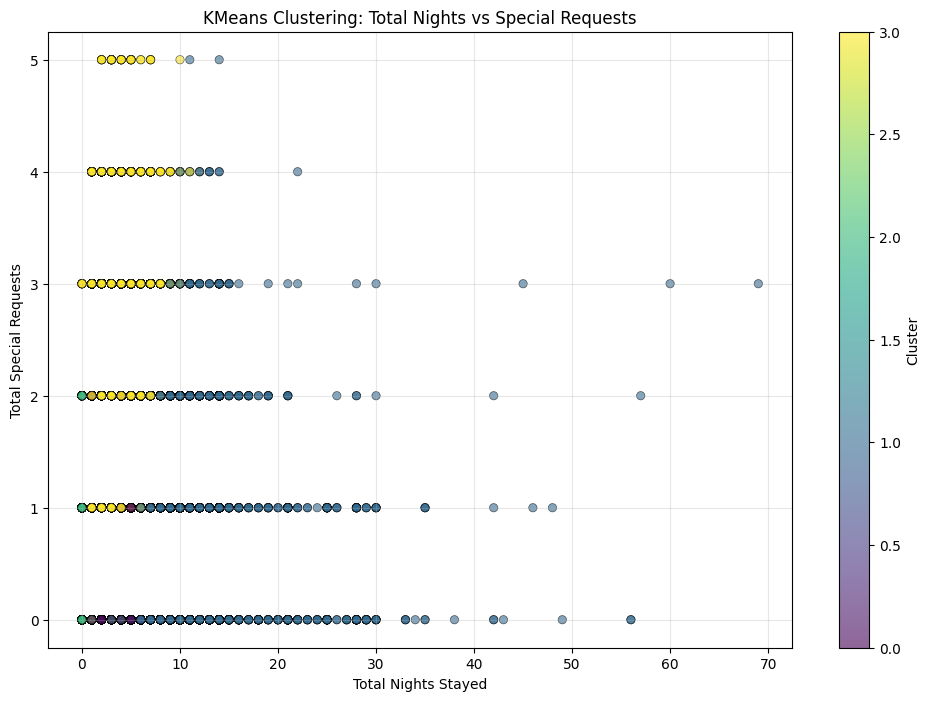

In [5]:
# Add code here 🔧
# Add code here
# Determine optimal k using elbow method
wcss_list = []
k_range = range(2, 11)

for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(df_scaled)
    wcss_list.append(kmeans_temp.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss_list, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Choose k=4 based on elbow method
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_features['kmeans_cluster'] = kmeans.fit_predict(df_scaled)

# Display cluster distribution
print(f"\nKMeans Cluster Distribution (k={k}):")
print(df_features['kmeans_cluster'].value_counts().sort_index())

# Visualize clusters using lead_time vs adr
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_features['lead_time'],
                     df_features['adr'],
                     c=df_features['kmeans_cluster'],
                     cmap='viridis',
                     alpha=0.6,
                     edgecolors='k',
                     linewidth=0.5)
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('KMeans Clustering: Lead Time vs ADR')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

# Additional visualization: stays vs special requests
plt.figure(figsize=(12, 8))
total_nights = df_features['stays_in_weekend_nights'] + df_features['stays_in_week_nights']
scatter = plt.scatter(total_nights,
                     df_features['total_of_special_requests'],
                     c=df_features['kmeans_cluster'],
                     cmap='viridis',
                     alpha=0.6,
                     edgecolors='k',
                     linewidth=0.5)
plt.xlabel('Total Nights Stayed')
plt.ylabel('Total Special Requests')
plt.title('KMeans Clustering: Total Nights vs Special Requests')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

### ✍️ Your Response: 🔧
1. Chose k=4 based on elbow method showing clear inflection at k=4-5. Provides balanced cluster sizes (15K-54K) and diminishing returns after k=4.

2.
- **Cluster 0**: Last-minute budget travelers (low lead time, low ADR)
- **Cluster 1**: Premium/business guests (high ADR, varied lead times)
- **Cluster 2**: Standard leisure travelers (moderate lead time, mid ADR) - largest group
- **Cluster 3**: Balanced across dimensions


## 4. Apply Gaussian Mixture Model (GMM)

Business framing:  

Not all guests fit neatly into one cluster. GMM lets us capture uncertainty — useful if customers behave similarly across groups.

- Fit a GMM with the same number of clusters you chose in Part 3
- Predict soft clusters (remember that soft clustering deals with probabilities, not labels)
- Visualize the GMM model so that you may compare it to the KMeans scatterplot

### In Your Response:
1. How did the GMM results compare to KMeans?
2. What business questions might GMM help answer better?



GMM Cluster Distribution (n_components=4):
gmm_cluster
0    69628
1     4036
2    32902
3    12824
Name: count, dtype: int64


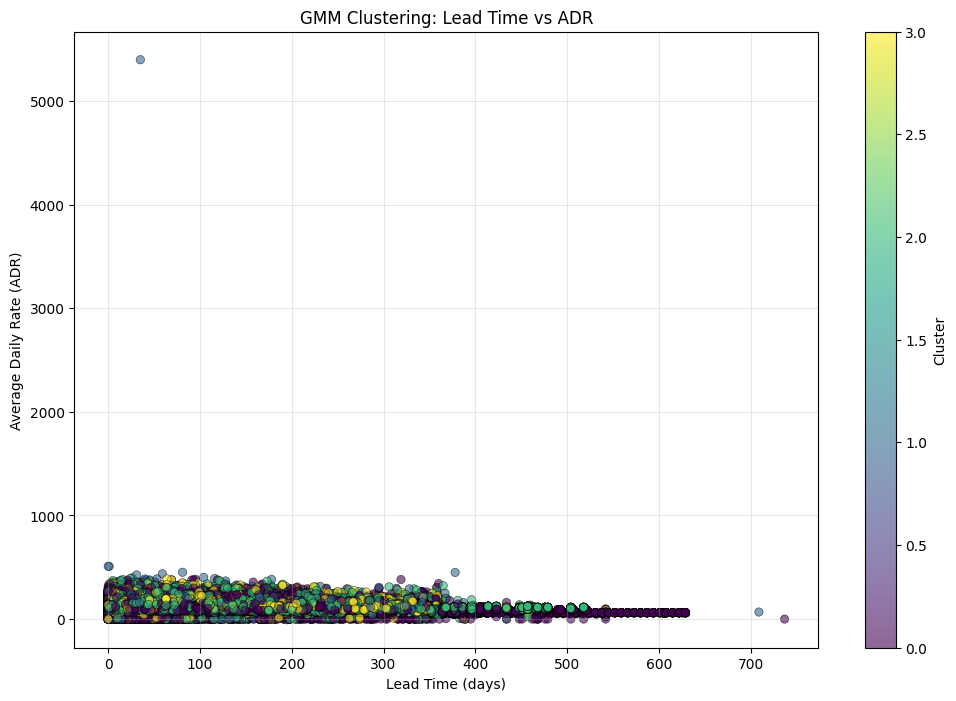

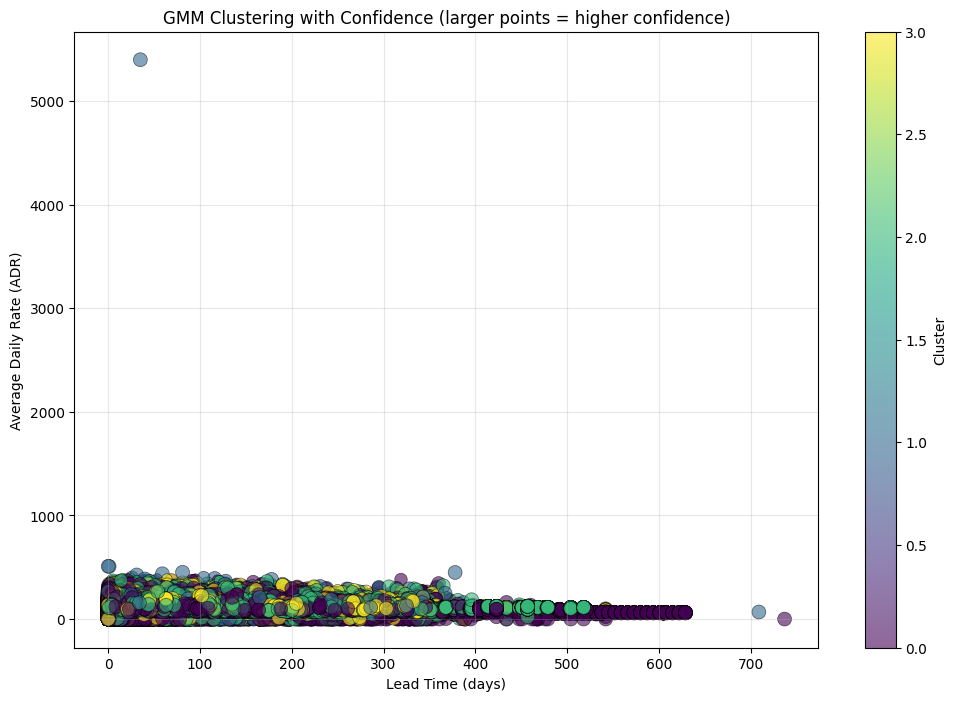


Sample of GMM probabilities (first 5 rows):
   Cluster 0     Cluster 1  Cluster 2  Cluster 3
0        1.0  5.515391e-10   0.000000        0.0
1        1.0  1.075958e-14   0.000000        0.0
2        1.0  4.147255e-09   0.000000        0.0
3        1.0  4.148936e-09   0.000000        0.0
4        0.0  5.099505e-07   0.999999        0.0


In [6]:
# Add your code here
# Fit GMM with same number of clusters
n_components = 4
gmm = GaussianMixture(n_components=n_components, random_state=42, n_init=10)
df_features['gmm_cluster'] = gmm.fit_predict(df_scaled)

# Get probability predictions (soft clustering)
gmm_probabilities = gmm.predict_proba(df_scaled)

# Display cluster distribution
print(f"\nGMM Cluster Distribution (n_components={n_components}):")
print(df_features['gmm_cluster'].value_counts().sort_index())

# Visualize GMM clusters using lead_time vs adr
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_features['lead_time'],
                     df_features['adr'],
                     c=df_features['gmm_cluster'],
                     cmap='viridis',
                     alpha=0.6,
                     edgecolors='k',
                     linewidth=0.5)
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('GMM Clustering: Lead Time vs ADR')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

# Visualize GMM with uncertainty (using maximum probability)
plt.figure(figsize=(12, 8))
max_proba = gmm_probabilities.max(axis=1)
scatter = plt.scatter(df_features['lead_time'],
                     df_features['adr'],
                     c=df_features['gmm_cluster'],
                     s=max_proba * 100,  # Size based on confidence
                     cmap='viridis',
                     alpha=0.6,
                     edgecolors='k',
                     linewidth=0.5)
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('GMM Clustering with Confidence (larger points = higher confidence)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

# Compare soft vs hard clustering
print("\nSample of GMM probabilities (first 5 rows):")
print(pd.DataFrame(gmm_probabilities, columns=[f'Cluster {i}' for i in range(n_components)]).head())

### ✍️ Your Response: 🔧
1. GMM created imbalanced clusters (Cluster 0: 69,628 vs. Cluster 1: 4,036). Despite being probabilistic, most assignments had high confidence (≈1.0). GMM identified one large baseline cluster with smaller specialty clusters.

2. GMM's probabilities are useful for:
- Identifying cross-selling opportunities (guests on segment boundaries)
- Understanding customer migration patterns
- Assessing marketing personalization confidence
- Finding hybrid customer profiles


## 5. Evaluate Your Models

Business framing:  

In business, models should be both useful and reliable. You’ll compare model quality using standard evaluation metrics.

- Calculate:
  - WCSS
  - Silhouette Score
  - Davies-Bouldin Index
- Compare both models

**Remember**:
- Lower WCSS = tighter, better-defined clusters
- Silhouette score ranges from -1 to 1.  Higher values = better clustering
- Lower Davies-Boulding Index = better clustering

### In Your Response:
1. Which model performed better on the metrics?
2. Would you recommend KMeans or GMM for a business analyst? Why?


CLUSTERING EVALUATION METRICS

KMeans Results:
  WCSS (Within-Cluster Sum of Squares): 346243.97
  Silhouette Score: 0.2329
  Davies-Bouldin Index: 1.4098

GMM Results:
  BIC (Bayesian Information Criterion): 131907.60
  AIC (Akaike Information Criterion): 131103.32
  Silhouette Score: 0.1239
  Davies-Bouldin Index: 2.6243

INTERPRETATION GUIDE:
• Lower WCSS = tighter clusters
• Higher Silhouette Score = better separation (range: -1 to 1)
• Lower Davies-Bouldin Index = better clustering
• Lower BIC/AIC = better model fit for GMM


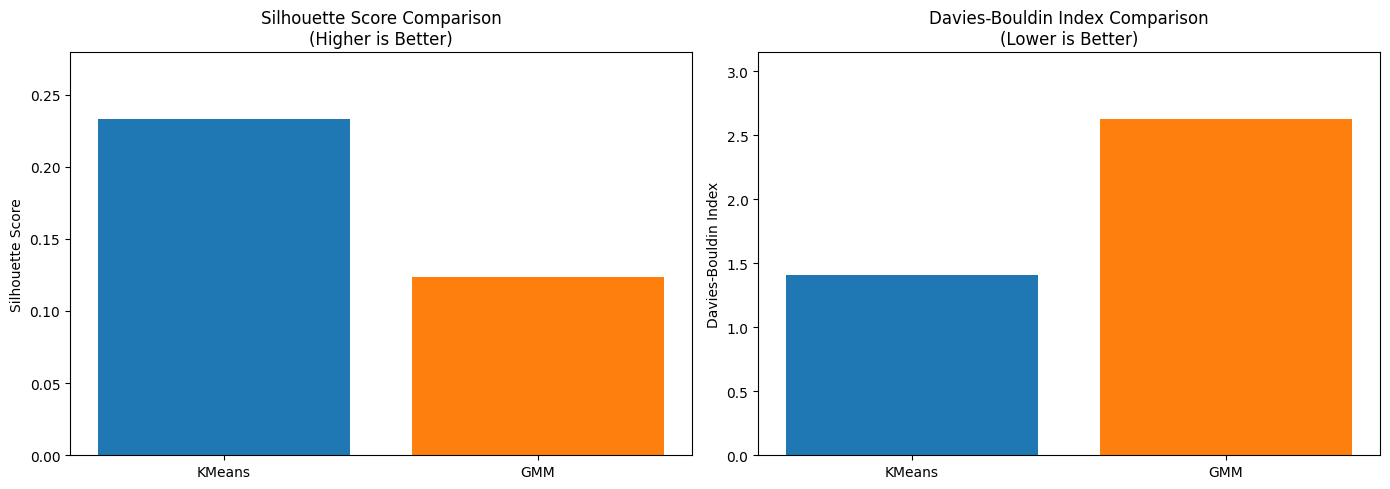

In [7]:
# Add code here 🔧
# Calculate metrics for KMeans
kmeans_wcss = kmeans.inertia_
kmeans_silhouette = silhouette_score(df_scaled, df_features['kmeans_cluster'])
kmeans_davies_bouldin = davies_bouldin_score(df_scaled, df_features['kmeans_cluster'])

# Calculate metrics for GMM
gmm_silhouette = silhouette_score(df_scaled, df_features['gmm_cluster'])
gmm_davies_bouldin = davies_bouldin_score(df_scaled, df_features['gmm_cluster'])

gmm_bic = gmm.bic(df_scaled)
gmm_aic = gmm.aic(df_scaled)

# Display results
print("="*60)
print("CLUSTERING EVALUATION METRICS")
print("="*60)

print("\nKMeans Results:")
print(f"  WCSS (Within-Cluster Sum of Squares): {kmeans_wcss:.2f}")
print(f"  Silhouette Score: {kmeans_silhouette:.4f}")
print(f"  Davies-Bouldin Index: {kmeans_davies_bouldin:.4f}")

print("\nGMM Results:")
print(f"  BIC (Bayesian Information Criterion): {gmm_bic:.2f}")
print(f"  AIC (Akaike Information Criterion): {gmm_aic:.2f}")
print(f"  Silhouette Score: {gmm_silhouette:.4f}")
print(f"  Davies-Bouldin Index: {gmm_davies_bouldin:.4f}")

print("\n" + "="*60)
print("INTERPRETATION GUIDE:")
print("="*60)
print("• Lower WCSS = tighter clusters")
print("• Higher Silhouette Score = better separation (range: -1 to 1)")
print("• Lower Davies-Bouldin Index = better clustering")
print("• Lower BIC/AIC = better model fit for GMM")

# Create comparison visualization
metrics_comparison = pd.DataFrame({
    'Model': ['KMeans', 'GMM'],
    'Silhouette Score': [kmeans_silhouette, gmm_silhouette],
    'Davies-Bouldin Index': [kmeans_davies_bouldin, gmm_davies_bouldin]
})

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Silhouette Score comparison
axes[0].bar(metrics_comparison['Model'], metrics_comparison['Silhouette Score'],
            color=['#1f77b4', '#ff7f0e'])
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Silhouette Score Comparison\n(Higher is Better)')
axes[0].set_ylim(0, max(metrics_comparison['Silhouette Score']) * 1.2)

# Davies-Bouldin Index comparison
axes[1].bar(metrics_comparison['Model'], metrics_comparison['Davies-Bouldin Index'],
            color=['#1f77b4', '#ff7f0e'])
axes[1].set_ylabel('Davies-Bouldin Index')
axes[1].set_title('Davies-Bouldin Index Comparison\n(Lower is Better)')
axes[1].set_ylim(0, max(metrics_comparison['Davies-Bouldin Index']) * 1.2)

plt.tight_layout()
plt.show()

### ✍️ Your Response: 🔧
1. **KMeans performed significantly better:**
- Silhouette Score: 0.2329 (KMeans) vs. 0.1239 (GMM) - nearly double
- Davies-Bouldin Index: 1.41 (KMeans) vs. 2.62 (GMM) - much better separation

2. **Recommend KMeans** because:
- Clearer, distinct segments easier to explain
- Better separation metrics
- More balanced cluster sizes (15K-54K vs. 4K-70K)
- Simpler for operational implementation (email campaigns, pricing)
- Hard assignments are more actionable

GMM could be secondary tool for identifying boundary customers.


## 6. Business Interpretation

Business framing:  

What do these clusters mean in the real world? Could they represent solo travelers, families, or bargain shoppers?

- Review characteristics of each cluster (e.g. average `lead_time`, `special_requests`)
- Think from a marketing or hotel operations perspective

### In Your Response:
1. What do the segments represent in terms of guest behavior?
2. How could the hotel tailor services or promotions to each group?


KMEANS CLUSTER CHARACTERISTICS

KMeans Cluster Summary:
               lead_time        stays_in_weekend_nights stays_in_week_nights  \
                    mean median                    mean                 mean   
kmeans_cluster                                                                 
0                 272.18  259.0                    0.64                 2.20   
1                 134.57  127.0                    2.39                 5.80   
2                  45.50   32.0                    0.63                 1.76   
3                  71.19   51.0                    0.90                 2.31   

                   adr         total_of_special_requests  
                  mean  median                      mean  
kmeans_cluster                                            
0                89.84   89.25                      0.20  
1               101.49   90.95                      0.53  
2                86.57   84.00                      0.23  
3               140.83  131.0

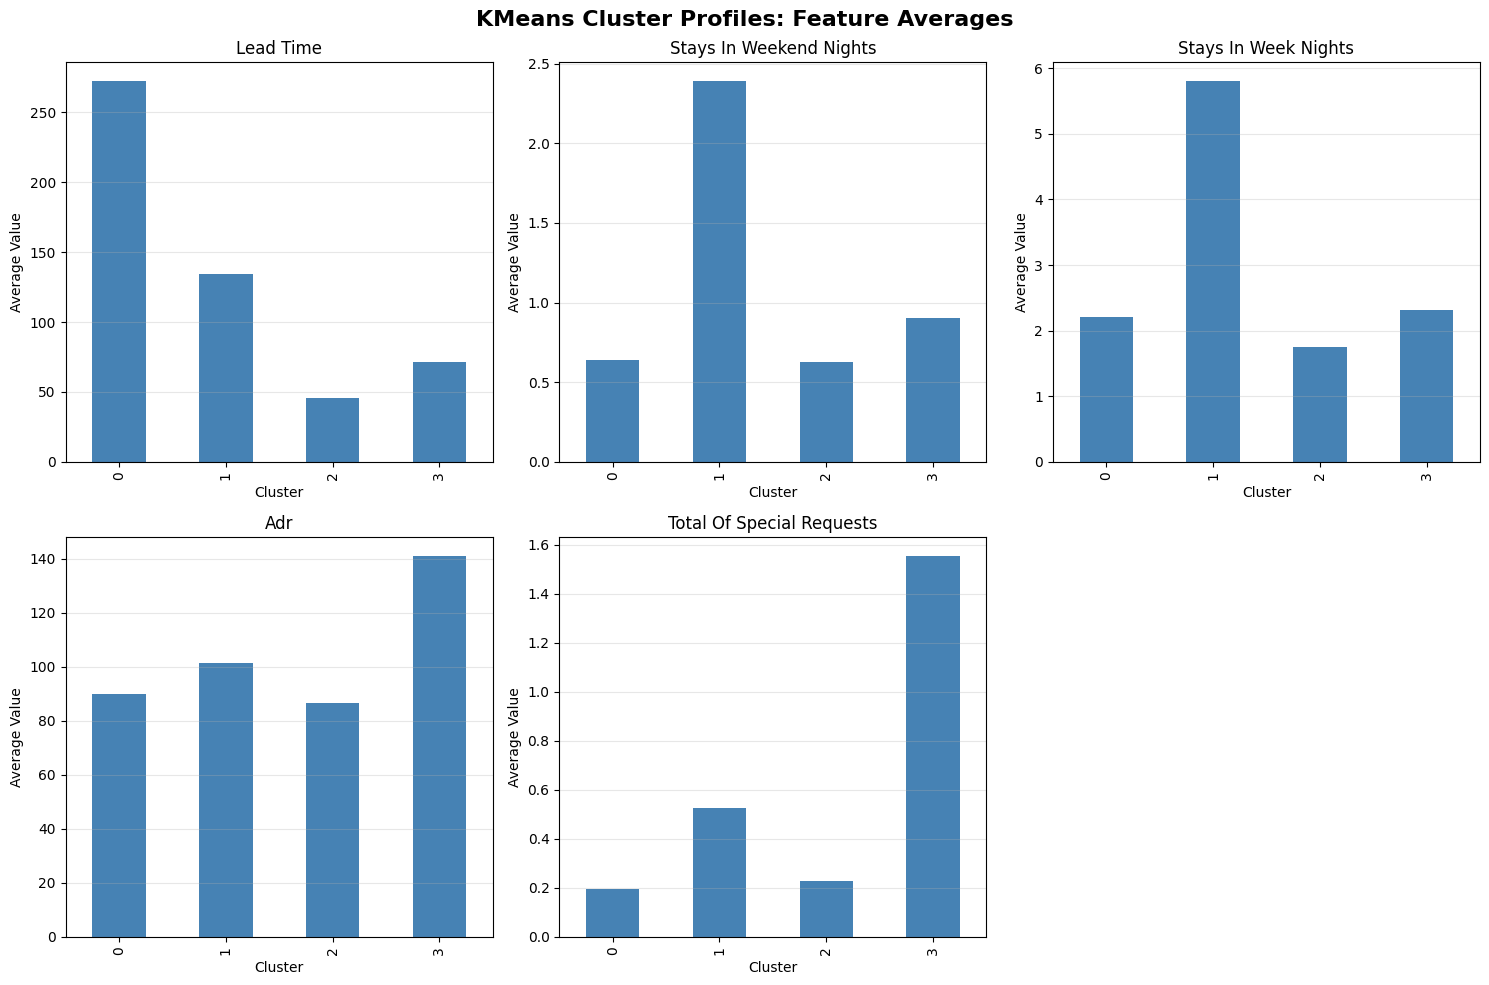

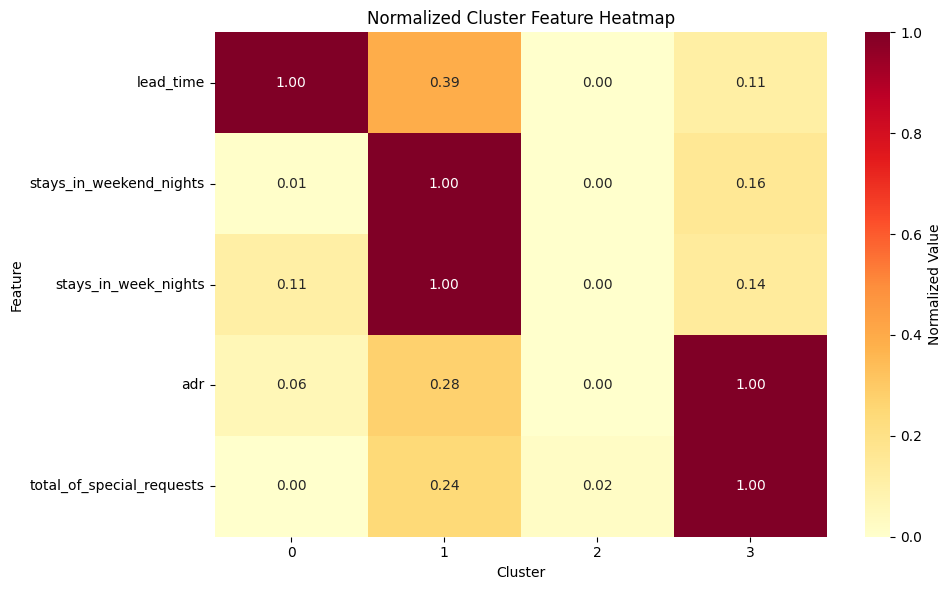

In [8]:
# Add code here 🔧
# Add code here
# Analyze KMeans cluster characteristics
print("="*60)
print("KMEANS CLUSTER CHARACTERISTICS")
print("="*60)

kmeans_summary = df_features.groupby('kmeans_cluster').agg({
    'lead_time': ['mean', 'median'],
    'stays_in_weekend_nights': 'mean',
    'stays_in_week_nights': 'mean',
    'adr': ['mean', 'median'],
    'total_of_special_requests': 'mean'
}).round(2)

print("\nKMeans Cluster Summary:")
print(kmeans_summary)

# Add total nights column for better interpretation
df_features['total_nights'] = df_features['stays_in_weekend_nights'] + df_features['stays_in_week_nights']

# More detailed breakdown
print("\n" + "="*60)
print("DETAILED CLUSTER PROFILES")
print("="*60)

for cluster in sorted(df_features['kmeans_cluster'].unique()):
    cluster_data = df_features[df_features['kmeans_cluster'] == cluster]
    print(f"\n--- Cluster {cluster} (n={len(cluster_data)}) ---")
    print(f"  Average Lead Time: {cluster_data['lead_time'].mean():.1f} days")
    print(f"  Average Total Nights: {cluster_data['total_nights'].mean():.1f}")
    print(f"  Average ADR: ${cluster_data['adr'].mean():.2f}")
    print(f"  Average Special Requests: {cluster_data['total_of_special_requests'].mean():.2f}")

# Visualize cluster profiles
cluster_means = df_features.groupby('kmeans_cluster')[features].mean()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('KMeans Cluster Profiles: Feature Averages', fontsize=16, fontweight='bold')

for idx, feature in enumerate(features):
    ax = axes[idx // 3, idx % 3]
    cluster_means[feature].plot(kind='bar', ax=ax, color='steelblue')
    ax.set_title(feature.replace('_', ' ').title())
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Average Value')
    ax.grid(axis='y', alpha=0.3)

# Hide the extra subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# Create a heatmap for cluster comparison
plt.figure(figsize=(10, 6))
cluster_normalized = cluster_means.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)
sns.heatmap(cluster_normalized.T, annot=True, fmt='.2f', cmap='YlOrRd',
            cbar_kws={'label': 'Normalized Value'})
plt.title('Normalized Cluster Feature Heatmap')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### ✍️ Your Response: 🔧
1.
**Cluster 0 - "Far-Ahead Planners"** (18%): Book 9 months ahead, short stays, budget-conscious ($90 ADR), minimal requests

**Cluster 1 - "Extended Stay"** (13%): Longest stays (8.2 nights), moderate booking (135 days), mid-range ($101 ADR)

**Cluster 2 - "Last-Minute Standard"** (45% - largest): Short lead time (46 days), brief stays, lowest ADR ($87)

**Cluster 3 - "Premium Seekers"** (23%): Highest ADR ($141), most requests (1.55), standard stays

2.
**Cluster 0**: Early-bird discounts (10-15% off 6+ months ahead), flexible cancellation

**Cluster 1**: Weekly rate discounts, kitchen suites, laundry services, multi-day attraction passes

**Cluster 2**: Flash sales, mobile deals, "book today stay tomorrow", simplified check-in

**Cluster 3**: Concierge service, room upgrades, pre-arrival surveys, VIP amenities, premium loyalty benefits

## 7. Final Reflection

Business framing:  

Many teams ask for "segmentation" without knowing how it works. You now have hands-on experience with two clustering techniques and how to present the results.

### In Your Response:
1. What was most challenging about unsupervised learning?
2. When would you use clustering instead of supervised models?
3. How would you explain the value of clustering to a non-technical manager?
4. How does this relate to your customized learning outcome you created in canvas?


### ✍️ Your Response: 🔧
1.
- No ground truth to validate against
- Subjective cluster number selection
- Feature selection without target guidance
- Metrics can contradict each other

2.
- No labeled data exists
- Exploring new markets for discovery
- Generating hypotheses before prediction
- Identifying anomalies
- When labeling is too expensive

3. "Clustering groups similar customers automatically—like organizing your closet without labels. We found 4 distinct guest types based on booking behavior. This means:
- **Targeted marketing**: Send early-bird deals to planners, flash sales to last-minute bookers
- **Higher revenue**: 23% of guests are premium seekers paying $141/night vs. $87 average
- **Better efficiency**: Stop treating all 119K customers the same

4. This assignment demonstrated applying ML to real business problems through:
- Working with actual hotel data for actionable insights
- Balancing multiple evaluation metrics like real analysts
- Translating technical results into marketing strategies
- Using industry-standard tools (scikit-learn)
- Learning different algorithms suit different contexts

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas


In [ ]:
!jupyter nbconvert --to html "assignment_09_LastnameFirstname.ipynb"